<H1>Домашняя работа №3</H1>

In [196]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [179]:
a = np.array([100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150])
a.sort()
a


array([ 17,  24,  25,  30,  33,  45,  55,  57,  65,  65,  70,  75,  75,
        77,  80,  84,  89,  90, 100, 150])

In [180]:
def my_num(array):
    num = 0
    for i in a:
        num += 1;
    return num

In [181]:
def my_sum(array):
    sum = 0
    for i in a:
        sum += i;
    return sum

In [182]:
def my_mean(array):
    return(sum/num); 
    

In [183]:
print(my_mean(a))
print(np.mean(a))

65.3
65.3


In [184]:
def diff_sum_sqr(array):
    mean = my_mean(array)
    my_sum_sqr = 0
    for i in array:
        my_sum_sqr += (i - my_mean(array)) ** 2
    return(my_sum_sqr)

In [185]:
def my_biased_var(array):
    return diff_sum_sqr(array)/my_num(array)

In [186]:
print(my_biased_var(a))
print(np.var(a))

950.11
950.1099999999999


In [187]:
def my_unbiased_var(array):
    return diff_sum_sqr(array)/(my_num(array)-1)

In [188]:
print(my_unbiased_var(a))
print(np.var(a, ddof=1))

1000.1157894736842
1000.115789473684


In [189]:
def my_std(array):
    return sqrt(my_unbiased_var(array))

In [190]:
print(my_std(a))
print(np.std(a, ddof=1))

31.624607341019814
31.62460734101981


Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выборсы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [191]:
my_num(a)

20

In [192]:
def my_median(sorted_list):
    indices = []
    list_size = len(sorted_list)
    median = 0
    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  
        indices.append(int(list_size / 2))
        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))
        median = sorted_list[indices[0]]
        pass
    return median, indices

In [193]:
median, median_indices = my_median(a)
Q1, Q1_indices = find_median(a[:median_indices[0]])
Q2, Q2_indices = find_median(a[median_indices[-1] + 1:])
quartiles = [Q1, median, Q2]
print(quartiles)

[33, 67.5, 84]


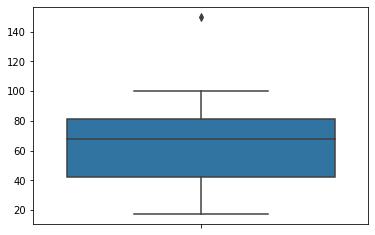

In [197]:
sns.boxplot(a, orient='v')
plt.show()

Задача 3
В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?
Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

In [199]:
a = 0.8
b = 0.7
c = 0.9

In [209]:
# Вероятность обучения на факультете
A = 1 / 4
B = 1 / 4
C = 1 / 2 

In [210]:
P = A * a + B * b + C * c
P

0.825

In [211]:
def bayes(event2, event1_on_event2, event1):
    return event2 * event1_on_event2 / event1

In [212]:
P_A = bayes(A, a, P)
P_A

0.24242424242424246

In [213]:
P_B = bayes(B, b, P)
P_B

0.21212121212121213

In [214]:
P_C = bayes(C, c, P)
P_C

0.5454545454545455